# Mapping Stations with folium

In [2]:
import folium
import pandas as pd
df = pd.read_csv('NYC_Transit_Subway_Entrance_And_Exit_Data.csv')
df.head()

,Division,Line,Station Name,Station Latitude,Station Longitude,Route1,Route2,Route3,Route4,Route5,...,ADA,ADA Notes,Free Crossover,North South Street,East West Street,Corner,Entrance Latitude,Entrance Longitude,Station Location,Entrance Location
0,BMT,4 Avenue,25th St,40.660397,-73.998091,R,NaN,NaN,NaN,NaN,...,False,NaN,False,4th Ave,25th St,SW,40.660489,-73.998220,"(40.660397, -73.998091)","(40.660489, -73.99822)"
1,BMT,4 Avenue,25th St,40.660397,-73.998091,R,NaN,NaN,NaN,NaN,...,False,NaN,False,4th Ave,25th St,SE,40.660323,-73.997952,"(40.660397, -73.998091)","(40.660323, -73.997952)"
2,BMT,4 Avenue,36th St,40.655144,-74.003549,N,R,NaN,NaN,NaN,...,False,NaN,True,4th Ave,36th St,NW,40.654676,-74.004306,"(40.655144, -74.003549)","(40.654676, -74.004306)"
3,BMT,4 Avenue,36th St,40.655144,-74.003549,N,R,NaN,NaN,NaN,...,False,NaN,True,4th Ave,36th St,NE,40.654365,-74.004113,"(40.655144, -74.003549)","(40.654365, -74.004113)"
4,BMT,4 Avenue,36th St,40.655144,-74.003549,N,R,NaN,NaN,NaN,...,False,NaN,True,4th Ave,36th St,NW,40.654490,-74.004499,"(40.655144, -74.003549)","(40.65449, -74.004499)"


In [2]:
df.columns

Index(['Division', 'Line', 'Station Name', 'Station Latitude',
       'Station Longitude', 'Route1', 'Route2', 'Route3', 'Route4', 'Route5',
       'Route6', 'Route7', 'Route8', 'Route9', 'Route10', 'Route11',
       'Entrance Type', 'Entry', 'Exit Only', 'Vending', 'Staffing',
       'Staff Hours', 'ADA', 'ADA Notes', 'Free Crossover',
       'North South Street', 'East West Street', 'Corner', 'Entrance Latitude',
       'Entrance Longitude', 'Station Location', 'Entrance Location'],
      dtype='object')

In [3]:
df = df[['Division', 'Line', 'Station Name', 'Entry', 'Exit Only',
         'Entrance Latitude',
       'Entrance Longitude', 'Station Location', 'Entrance Location']]
df

,Division,Line,Station Name,Entry,Exit Only,Entrance Latitude,Entrance Longitude,Station Location,Entrance Location
0,BMT,4 Avenue,25th St,YES,NaN,40.660489,-73.998220,"(40.660397, -73.998091)","(40.660489, -73.99822)"
1,BMT,4 Avenue,25th St,YES,NaN,40.660323,-73.997952,"(40.660397, -73.998091)","(40.660323, -73.997952)"
2,BMT,4 Avenue,36th St,YES,NaN,40.654676,-74.004306,"(40.655144, -74.003549)","(40.654676, -74.004306)"
3,BMT,4 Avenue,36th St,YES,NaN,40.654365,-74.004113,"(40.655144, -74.003549)","(40.654365, -74.004113)"
4,BMT,4 Avenue,36th St,YES,NaN,40.654490,-74.004499,"(40.655144, -74.003549)","(40.65449, -74.004499)"
...,...,...,...,...,...,...,...,...,...
1863,IRT,White Plains Road,Simpson St,YES,NaN,40.823884,-73.893197,"(40.824073, -73.893064)","(40.823884, -73.893197)"
1864,IRT,White Plains Road,Simpson St,YES,NaN,40.824118,-73.892731,"(40.824073, -73.893064)","(40.824118, -73.892731)"
1865,IRT,White Plains Road,Wakefield-241st St,YES,NaN,40.903283,-73.850321,"(40.903125, -73.85062)","(40.903283, -73.850321)"
1866,IRT,White Plains Road,Wakefield-241st St,YES,NaN,40.903597,-73.850360,"(40.903125, -73.85062)","(40.903597, -73.85036)"


In [4]:
df1 = df[df['Exit Only'].isnull()]
print(len(df1))
df1

1812


,Division,Line,Station Name,Entry,Exit Only,Entrance Latitude,Entrance Longitude,Station Location,Entrance Location
0,BMT,4 Avenue,25th St,YES,NaN,40.660489,-73.998220,"(40.660397, -73.998091)","(40.660489, -73.99822)"
1,BMT,4 Avenue,25th St,YES,NaN,40.660323,-73.997952,"(40.660397, -73.998091)","(40.660323, -73.997952)"
2,BMT,4 Avenue,36th St,YES,NaN,40.654676,-74.004306,"(40.655144, -74.003549)","(40.654676, -74.004306)"
3,BMT,4 Avenue,36th St,YES,NaN,40.654365,-74.004113,"(40.655144, -74.003549)","(40.654365, -74.004113)"
4,BMT,4 Avenue,36th St,YES,NaN,40.654490,-74.004499,"(40.655144, -74.003549)","(40.65449, -74.004499)"
...,...,...,...,...,...,...,...,...,...
1863,IRT,White Plains Road,Simpson St,YES,NaN,40.823884,-73.893197,"(40.824073, -73.893064)","(40.823884, -73.893197)"
1864,IRT,White Plains Road,Simpson St,YES,NaN,40.824118,-73.892731,"(40.824073, -73.893064)","(40.824118, -73.892731)"
1865,IRT,White Plains Road,Wakefield-241st St,YES,NaN,40.903283,-73.850321,"(40.903125, -73.85062)","(40.903283, -73.850321)"
1866,IRT,White Plains Road,Wakefield-241st St,YES,NaN,40.903597,-73.850360,"(40.903125, -73.85062)","(40.903597, -73.85036)"


In [5]:
def str_to_coords(series):
    coords = []
    for s in series:
        coord = s[1:-1].strip(' ').split(',')
        coords.append(coord)
    return coords

In [14]:
coords = str_to_coords(df1['Station Location'].unique())
coords

[['40.660397', ' -73.998091'],
 ['40.655144', ' -74.003549'],
 ['40.648939', ' -74.010006'],
 ['40.645069', ' -74.014034'],
 ['40.641362', ' -74.017881'],
 ['40.629742', ' -74.02551'],
 ['40.622687', ' -74.028398'],
 ['40.616622', ' -74.030876'],
 ['40.670847', ' -73.988302'],
 ['40.683666', ' -73.97881'],
 ['40.634967', ' -74.023377'],
 ['40.690635', ' -73.981824'],
 ['40.665414', ' -73.992872'],
 ['40.677316', ' -73.98311'],
 ['40.766779', ' -73.921479'],
 ['40.756804', ' -73.929575'],
 ['40.752882', ' -73.932755'],
 ['40.770258', ' -73.917843'],
 ['40.76182', ' -73.925508'],
 ['40.775036', ' -73.912034'],
 ['40.67705', ' -73.972367'],
 ['40.68446', ' -73.97689'],
 ['40.62927', ' -73.961639'],
 ['40.625039', ' -73.960803'],
 ['40.617618', ' -73.959399'],
 ['40.5993', ' -73.955929'],
 ['40.644031', ' -73.964492'],
 ['40.577621', ' -73.961376'],
 ['40.650527', ' -73.962982'],
 ['40.640927', ' -73.963891'],
 ['40.60867', ' -73.957734'],
 ['40.595246', ' -73.955161'],
 ['40.635082', ' -7

In [101]:
import requests
topo = 'https://github.com/nychealth/coronavirus-data/blob/master/Geography-resources/MODZCTA_2010_WGS1984.topo.json'
covid_data = pd.read_csv('https://raw.githubusercontent.com/nychealth/coronavirus-data/master/data-by-modzcta.csv')
geo_data = 'https://raw.githubusercontent.com/nychealth/coronavirus-data/master/Geography-resources/MODZCTA_2010_WGS1984.geo.json'

lat = 40.735
long = -74.0001

nyc_map = folium.Map([lat, long], zoom_start=12.5)
folium.Choropleth(
    geo_data=geo_data,
    name='choropleth',
    tiles='Stamen Toner',
    data=covid_data,
    columns=['MODIFIED_ZCTA', 'PERCENT_POSITIVE'],
    key_on='feature.properties.MODZCTA',
    fill_color='PuBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='COVID Case Rates'
).add_to(nyc_map)

folium.LayerControl().add_to(nyc_map)

nyc_map

In [90]:
station_locations = {'42nd St-Port Authority': (40.7559, -73.9871), 
 '34th St-Penn Station': (40.7511, -73.9903),
 '34th St Herald Square': (40.7501, -73.9881),
 '125th St': (40.8044, -73.9374),
 '86th St': (40.7777, -73.9516),
 '14th St-Union Square': (40.7353, -73.9911),
 'Grand Central-42nd St': (40.7527, -73.9772),
 '23rd St': (40.7441, -73.9957),
 'Jackson Heights-Roosevelt Ave': (40.7467, -73.8910),
 'Flushing-Main St': (40.7596, -73.8299)}

markers = []
for coordinates in station_locations.values():
    markers.append(folium.Marker(coordinates))

for marker in markers:
    marker.add_to(nyc_map)

In [91]:
nyc_map

In [106]:
import os

In [127]:
covid_data = pd.read_csv('https://raw.githubusercontent.com/nychealth/coronavirus-data/master/data-by-modzcta.csv')
zcta_data = 'https://raw.githubusercontent.com/nychealth/coronavirus-data/master/Geography-resources/MODZCTA_2010_WGS1984.geo.json'
zcta = os.path.join('geoman.json')
covid_data.MODIFIED_ZCTA = covid_data.MODIFIED_ZCTA.astype(str)
covid_data

,MODIFIED_ZCTA,NEIGHBORHOOD_NAME,BOROUGH_GROUP,COVID_CASE_COUNT,COVID_CASE_RATE,POP_DENOMINATOR,COVID_DEATH_COUNT,COVID_DEATH_RATE,PERCENT_POSITIVE,TOTAL_COVID_TESTS
0,10001,Chelsea/NoMad/West Chelsea,Manhattan,391,1659.38,23563.03,23,97.61,9.82,3980
1,10002,Chinatown/Lower East Side,Manhattan,1106,1440.94,76755.41,158,205.85,13.57,8153
2,10003,East Village/Gramercy/Greenwich Village,Manhattan,475,882.87,53801.62,34,63.20,7.56,6284
3,10004,Financial District,Manhattan,32,876.57,3650.61,1,27.39,7.75,413
4,10005,Financial District,Manhattan,67,797.99,8396.11,2,23.82,7.13,940
...,...,...,...,...,...,...,...,...,...,...
172,11691,Edgemere/Far Rockaway,Queens,2493,3849.66,64759.02,362,559.00,21.26,11729
173,11692,Arverne/Edgemere,Queens,646,3210.70,20120.24,92,457.25,19.27,3352
174,11693,Arverne/Broad Channel,Queens,338,2729.93,12381.27,30,242.30,21.28,1588
175,11694,Belle Harbor-Neponsit/Rockaway Park,Queens,745,3659.89,20355.78,86,422.48,21.93,3397


In [187]:
import matplotlib.pyplot as plt
covid_data.describe()

,COVID_CASE_COUNT,COVID_CASE_RATE,POP_DENOMINATOR,COVID_DEATH_COUNT,COVID_DEATH_RATE,PERCENT_POSITIVE,TOTAL_COVID_TESTS
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1163.903955,2375.182429,47425.734237,104.429379,206.406158,17.189096,6472.220339
std,829.556444,896.242396,26411.133886,82.973482,110.282341,5.614293,3749.613385
min,29.000000,634.180000,3457.770000,0.000000,0.000000,6.280000,413.000000
25%,539.000000,1689.680000,26614.420000,42.000000,134.490000,13.360000,3653.000000
50%,910.000000,2470.160000,43030.430000,81.000000,197.320000,18.190000,5777.000000
75%,1657.000000,3007.790000,67089.290000,147.000000,256.650000,21.860000,8732.000000
max,4780.000000,4544.430000,111594.100000,441.000000,708.910000,26.780000,18947.000000


(array([15., 19., 22., 19., 22., 32., 23., 15.,  4.,  6.]),
 array([ 634.18 , 1025.205, 1416.23 , 1807.255, 2198.28 , 2589.305,
        2980.33 , 3371.355, 3762.38 , 4153.405, 4544.43 ]),
 <a list of 10 Patch objects>)

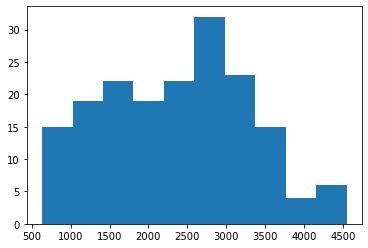

In [186]:
plt.hist(covid_data.COVID_CASE_RATE)

In [207]:
import numpy as np
myscale = (covid_data['COVID_CASE_COUNT'].quantile((0, 0.14, 0.285, 0.428, 0.571, 0.714, 0.857, 1))).tolist()
myscale

[29.0,
 244.12,
 444.48799999999994,
 647.0,
 910.0,
 1400.784,
 2066.0640000000003,
 4780.0]

In [208]:
lat = 40.735
long = -74.0001

nyc_map = folium.Map([lat, long], zoom_start=11.5)
folium.Choropleth(
    geo_data=zcta_data,
    name='choropleth',
    tiles='Stamen',
    data=covid_data,
    columns=['MODIFIED_ZCTA', 'COVID_CASE_COUNT'],
    key_on='feature.properties.MODZCTA',
    fill_color='YlOrRd',
    threshold_scale=myscale,
    fill_opacity=0.85,
    line_opacity=0.3,
    legend_name='COVID Case Rates'
).add_to(nyc_map)

folium.LayerControl().add_to(nyc_map)

nyc_map

In [202]:
station_locations = {'42nd St-Port Authority': (40.7559, -73.9871), 
 '34th St-Penn Station': (40.7511, -73.9903),
 '34th St Herald Square': (40.7501, -73.9881),
 '125th St': (40.8044, -73.9374),
 '86th St': (40.7777, -73.9516),
 '14th St-Union Square': (40.7353, -73.9911),
 'Grand Central-42nd St': (40.7527, -73.9772),
 '23rd St': (40.7441, -73.9957),
 'Jackson Heights-Roosevelt Ave': (40.7467, -73.8910),
 'Flushing-Main St': (40.7596, -73.8299)}

markers = []
for coordinates in station_locations.values():
    markers.append(folium.Marker(coordinates))

for marker in markers:
    marker.add_to(nyc_map)

In [203]:
nyc_map

In [145]:
!conda install geopandas

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: / 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
/ ^C
failed

CondaError: KeyboardInterrupt



In [144]:

import geopandas as gpd

ModuleNotFoundError: No module named 'geopandas'